In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import datasets, transforms, utils
from torch.utils.data.sampler import SubsetRandomSampler
from torch.nn import functional as F
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


198
Epoch [1/10], Averge Loss:for epoch[1, 0.7050]
Epoch [2/10], Averge Loss:for epoch[2, 0.4822]
Epoch [3/10], Averge Loss:for epoch[3, 0.3375]
Epoch [4/10], Averge Loss:for epoch[4, 0.2168]
Epoch [5/10], Averge Loss:for epoch[5, 0.1417]
Epoch [6/10], Averge Loss:for epoch[6, 0.1061]
Epoch [7/10], Averge Loss:for epoch[7, 0.0859]
Epoch [8/10], Averge Loss:for epoch[8, 0.0731]
Epoch [9/10], Averge Loss:for epoch[9, 0.0643]
Epoch [10/10], Averge Loss:for epoch[10, 0.0578]
Accuracy of the model on the test images: 99.858162 %
the learning rate is  0.0001
the momentum is 0.0


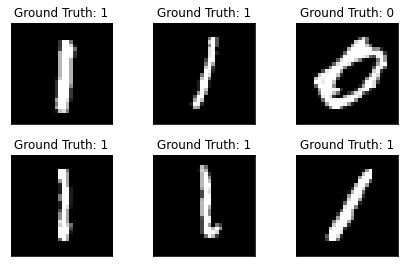

In [ ]:
batch_size = 64
#Hyper-parameters 
input_size = 784  #(dimension of image 28 * 28)
num_classes = 1   #(just -1 and 1 image)
num_epochs = 10  # number of times you will iterate through the full training data
learning_rate = 0.0001 ## step size used by SGD 
momentum = 0.0 ## Momentum is a moving average of our gradients (helps to keep direction)




## USE THIS SNIPPET TO GET BINARY TRAIN/TEST DATA
transform = transforms.ToTensor()

train_data = datasets.MNIST(root = 'data', train = True, download = True, transform = transform)
test_data = datasets.MNIST(root = 'data', train = False, download = True, transform = transform)

subset_indices = ((train_data.train_labels == 0) + (train_data.train_labels == 1)).nonzero().view(-1)

train_loader = torch.utils.data.DataLoader(dataset=train_data, 
                                           batch_size=batch_size, 
                                           shuffle=False,
                                           sampler=SubsetRandomSampler(subset_indices))

subset_indices = ((test_data.test_labels == 0) + (test_data.test_labels == 1)).nonzero().view(-1)

test_loader = torch.utils.data.DataLoader(dataset=test_data, 
                                          batch_size=batch_size,
                                          shuffle=False,
                                          sampler=SubsetRandomSampler(subset_indices))

## Displaying some sample images in train_loader with its ground truth

samples = enumerate(train_loader)
batch_idx, (sample_data, sample_targets) = next(samples)
sample_data.shape

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(sample_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(sample_targets[i]))
    plt.xticks([])
    plt.yticks([]) 
    fig   


total_step = len(train_loader)
print(total_step)

class SVM_Loss(nn.modules.Module):    
    def __init__(self):
        super(SVM_Loss,self).__init__()
    def forward(self, outputs, labels):
         return torch.sum(torch.clamp(1 - outputs.t()*labels, min=0))/batch_size

#SVM regression model and Loss
svm_model = nn.Linear(input_size,num_classes)
#model = LogisticRegression(input_size,num_classes)

## Loss criteria and SGD optimizer
svm_loss_criteria = SVM_Loss()

#loss_criteria = nn.CrossEntropyLoss()  

svm_optimizer = torch.optim.SGD(svm_model.parameters(), lr=learning_rate, momentum=momentum)

total_step = len(train_loader)
for epoch in range(num_epochs):
    avg_loss_epoch = 0
    batch_loss = 0
    total_batches = 0
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, 28*28)                      
        labels = Variable(2*(labels.float()-0.5))
                
        # Forward pass        
        outputs = svm_model(images)           
        loss_svm = svm_loss_criteria(outputs, labels)    
        
       
        # Backward and optimize
        svm_optimizer.zero_grad()
        loss_svm.backward()
        svm_optimizer.step()    
        
        #print("Model's parameter after the update:")
        #for param2 in svm_model.parameters():
         #   print(param2)
        total_batches += 1     
        batch_loss += loss_svm.item()

    avg_loss_epoch = batch_loss/total_batches
    print ('Epoch [{}/{}], Averge Loss:for epoch[{}, {:.4f}]' 
                   .format(epoch+1, num_epochs, epoch+1, avg_loss_epoch ))
        

        # Test the SVM Model
correct = 0.
total = 0.
for images, labels in test_loader:
    images = images.reshape(-1, 28*28)
    
    outputs = svm_model(images)    
    predicted = outputs.data >= 0
    total += labels.size(0) 
    correct += (predicted.view(-1).long() == labels).sum()    
 
print('Accuracy of the model on the test images: %f %%' % (100 * (correct.float() / total)))
print("the learning rate is ", learning_rate)
print( "the momentum is", momentum)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (droput): Dropout(p=0.2, inplace=False)
)
Epoch: 1 	Training Loss: 0.954583 	Validation Loss: 0.000466
Validation loss decreased (inf --> 0.000466).  Saving model ...
Epoch: 2 	Training Loss: 0.356667 	Validation Loss: 0.000383
Validation loss decreased (0.000466 --> 0.000383).  Saving model ...
Epoch: 3 	Training Loss: 0.282127 	Validation Loss: 0.000812
Epoch: 4 	Training Loss: 0.233029 	Validation Loss: 0.000550
Epoch: 5 	Training Loss: 0.199156 	Validation Loss: 0.000317
Validation loss decreased (0.000383 --> 0.000317).  Saving model ...
Epoch: 6 	Training Loss: 0.171463 	Validation Loss: 0.000460
Epoch: 7 	Training Loss: 0.152733 	Validation Loss: 0.000051
Validation loss decreased (0.000317 --> 0.000051).  Saving model ...
Epoch: 8 	Training Loss: 0.137353 	Validation Loss: 0.000241
Epoch: 

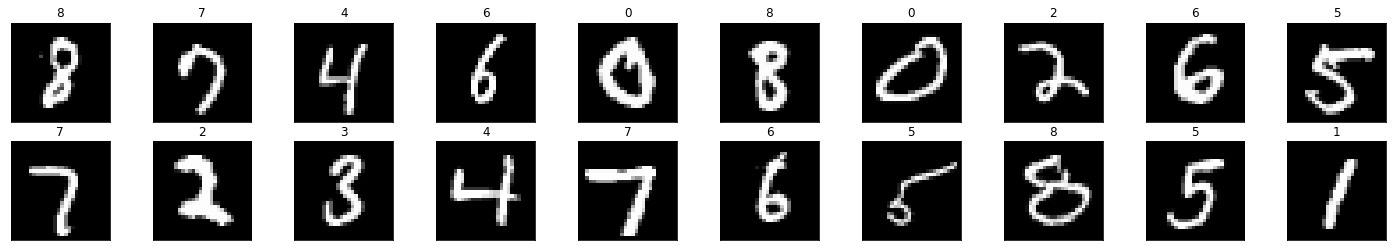

In [ ]:
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation
valid_size = 0.2
# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_index, valid_index = indices[split:], indices[:split]
# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_index)
valid_sampler = SubsetRandomSampler(valid_index)
# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, 
                                           sampler = train_sampler, num_workers = num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size,
                                          sampler = valid_sampler, num_workers = num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size,
                                         num_workers = num_workers)
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

# define NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        # number of hidden nodes in each layer (512)
        hidden_1 = 512
        hidden_2 = 512
        # linear layer (784 -> hidden_1)
        self.fc1 = nn.Linear(28*28, 512)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(512,512)
        # linear layer (n_hidden -> 10)
        self.fc3 = nn.Linear(512,10)
        # dropout layer (p=0.2)
        # dropout prevents overfitting of data
        self.droput = nn.Dropout(0.2)
        
    def forward(self,x):
        # flatten image input
        x = x.view(-1,28*28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.droput(x)
         # add hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        # add dropout layer
        x = self.droput(x)
        # add output layer
        x = self.fc3(x)
        return x
# initialize the NN
model = Net()
print(model)
# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()
# specify optimizer (stochastic gradient descent) and learning rate = 0.01
optimizer = torch.optim.SGD(model.parameters(),lr = 0.01)
# number of epochs to train the model
n_epochs = 50
# initialize tracker for minimum validation loss
valid_loss_min = np.Inf  # set initial "min" to infinity
for epoch in range(n_epochs):
    # monitor losses
    train_loss = 0
    valid_loss = 0
    
     
    ###################
    # train the model #
    ###################
    model.train() # prep model for training
    for data,label in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output,label)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item() * data.size(0)
        
        
     ######################    
    # validate the model #
    ######################
    model.eval()  # prep model for evaluation
    for data,label in valid_loader:
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output,label)
        # update running validation loss 
        valid_loss = loss.item() * data.size(0)
    
    # print training/validation statistics 
    # calculate average loss over an epoch
    train_loss = train_loss / len(train_loader.sampler)
    valid_loss = valid_loss / len(valid_loader.sampler)
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch+1, 
        train_loss,
        valid_loss
        ))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model.pt')
        valid_loss_min = valid_loss

model.load_state_dict(torch.load('model.pt'))
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
model.eval() # prep model for evaluation
for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(len(target)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1
# calculate and print avg test loss
test_loss = test_loss/len(test_loader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))
for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))
print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

